In [136]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("C:/Users/Evita Costa/Downloads/bank+marketing/bank/bank-full.csv", delimiter = ';')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [138]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [139]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


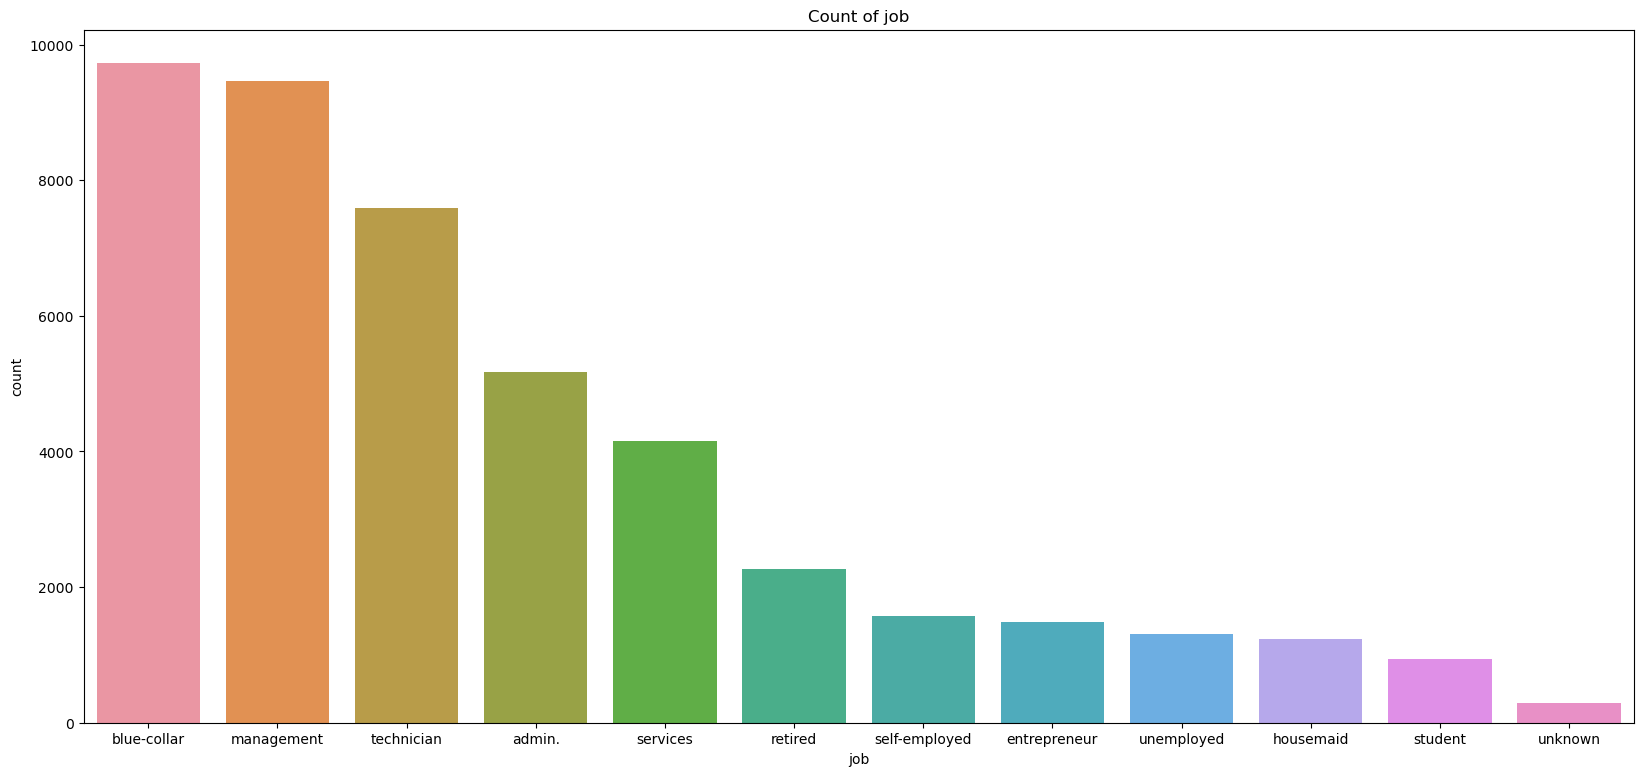

In [140]:
plt.figure(figsize=(20,9))
count = df['job'].value_counts()
sns.barplot(x=count.index,y=count.values)
plt.title('Count of job')
plt.xlabel('job')
plt.ylabel('count')
plt.show()

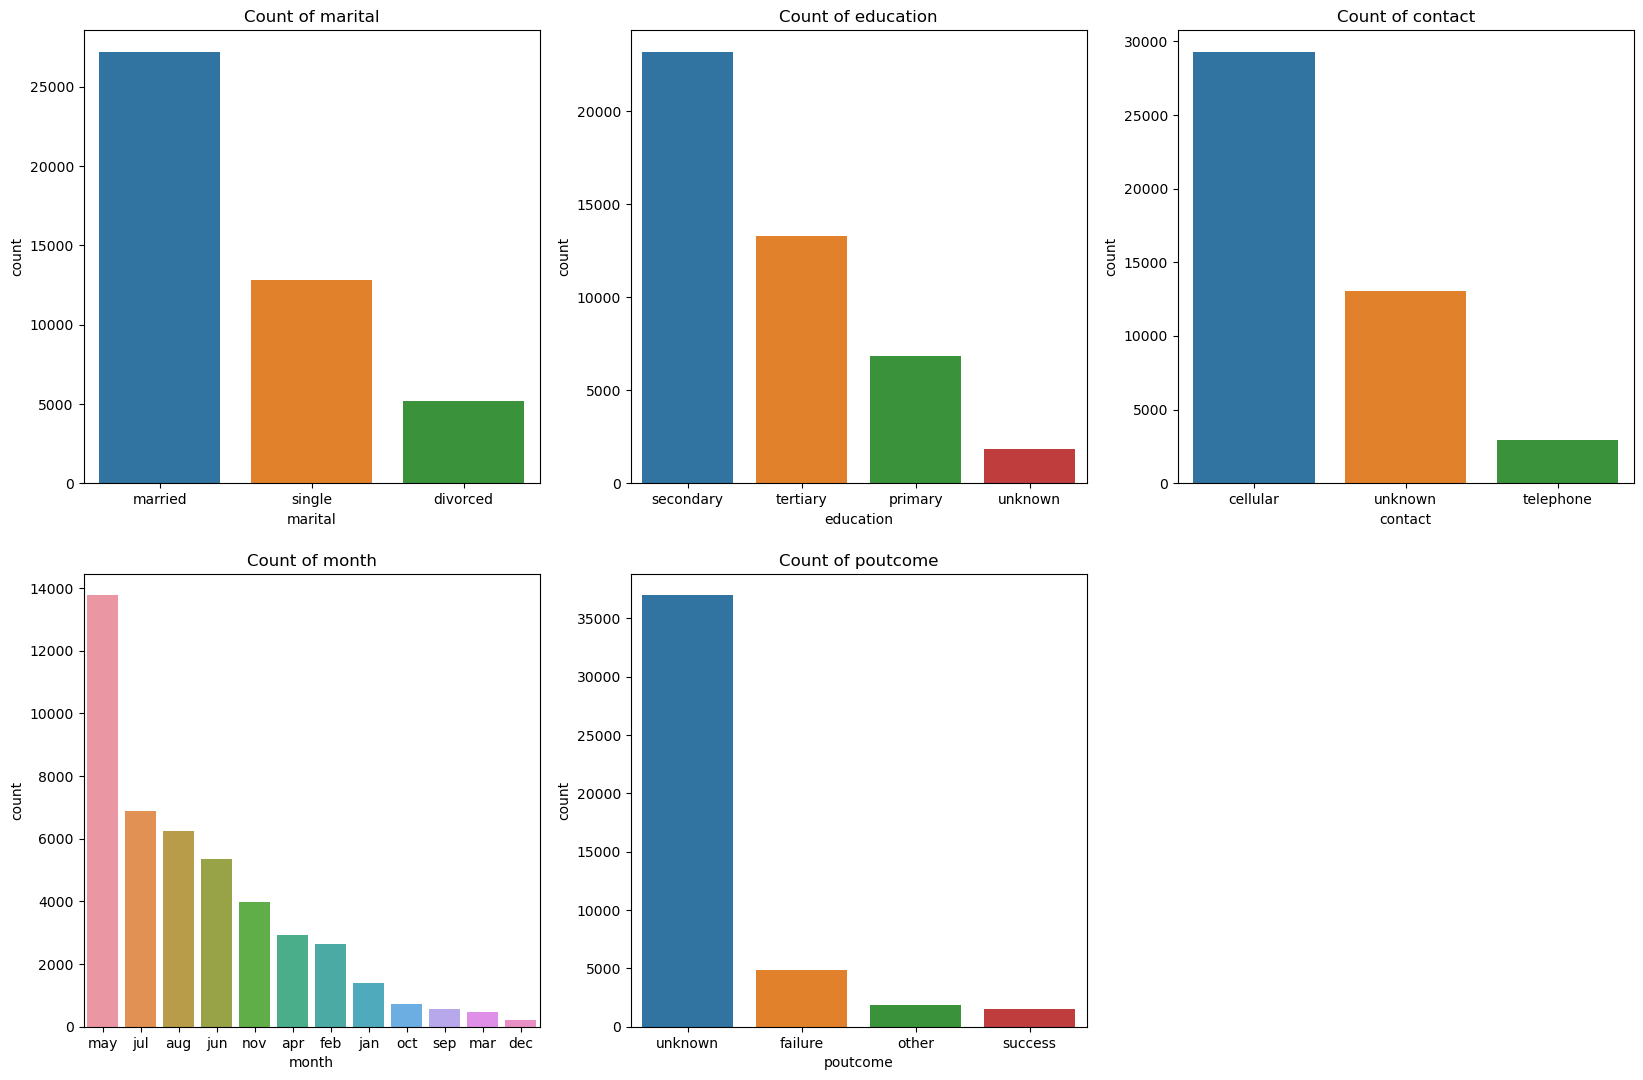

In [141]:
cate = ['marital','education','contact','month','poutcome']
plt.figure(figsize=(20,20))
for i,  col in enumerate(cate, 1):
    plt.subplot(3,3,i)
    count = df[col].value_counts()
    sns.barplot(x=count.index,y =count.values)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
plt.show()

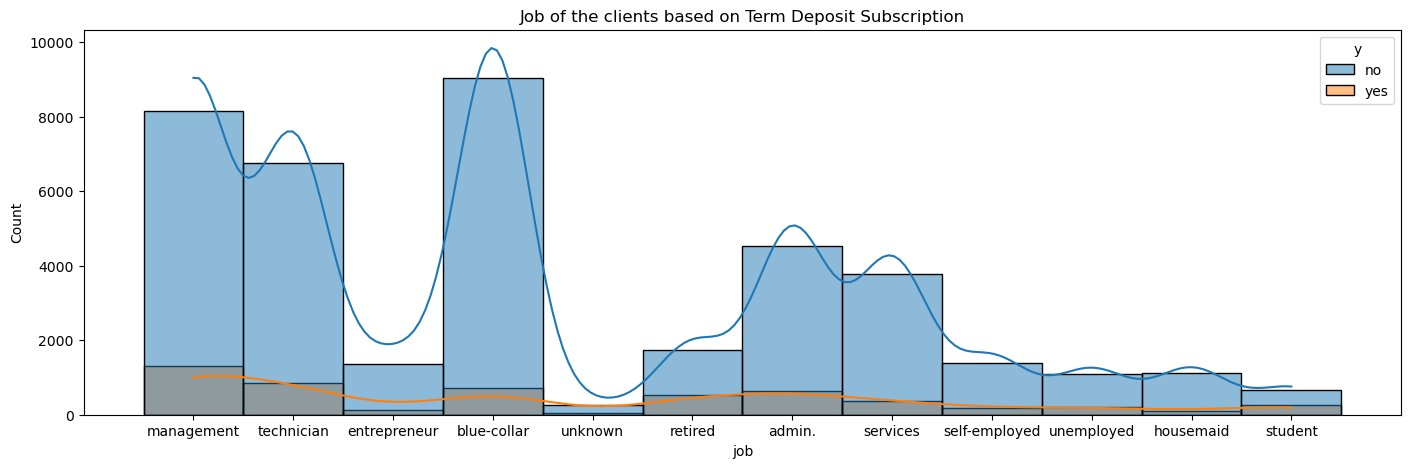

In [142]:
plt.figure(figsize=(17,5))
sns.histplot(data=df,x='job',hue='y',kde=True)
plt.title('Job of the clients based on Term Deposit Subscription')
plt.show()

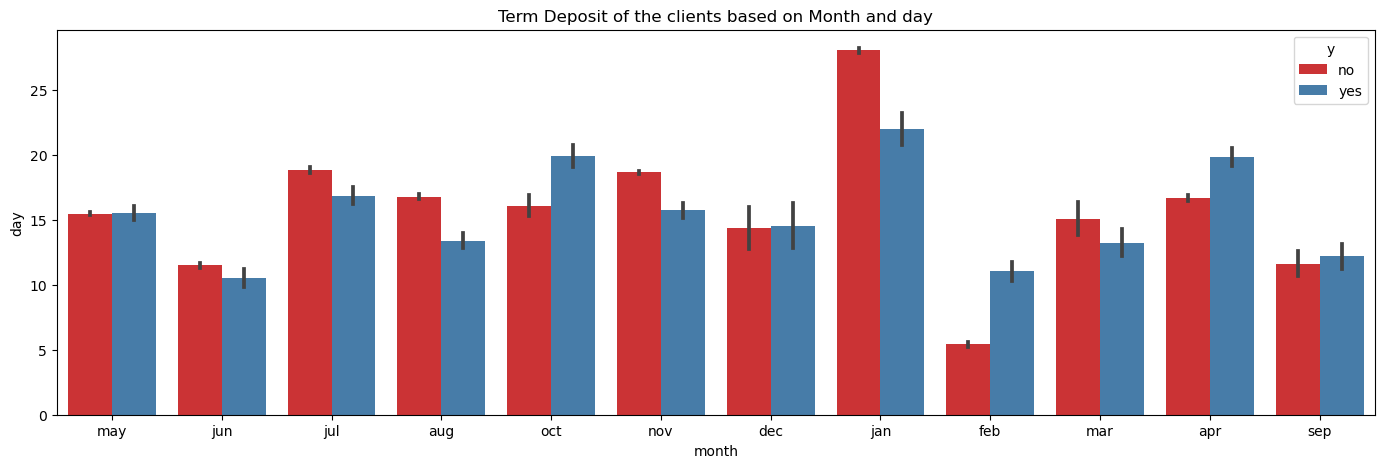

In [143]:
plt.figure(figsize=(17,5))
sns.barplot(data=df,x='month',y='day',hue='y',palette='Set1')
plt.title('Term Deposit of the clients based on Month and day')
plt.show()

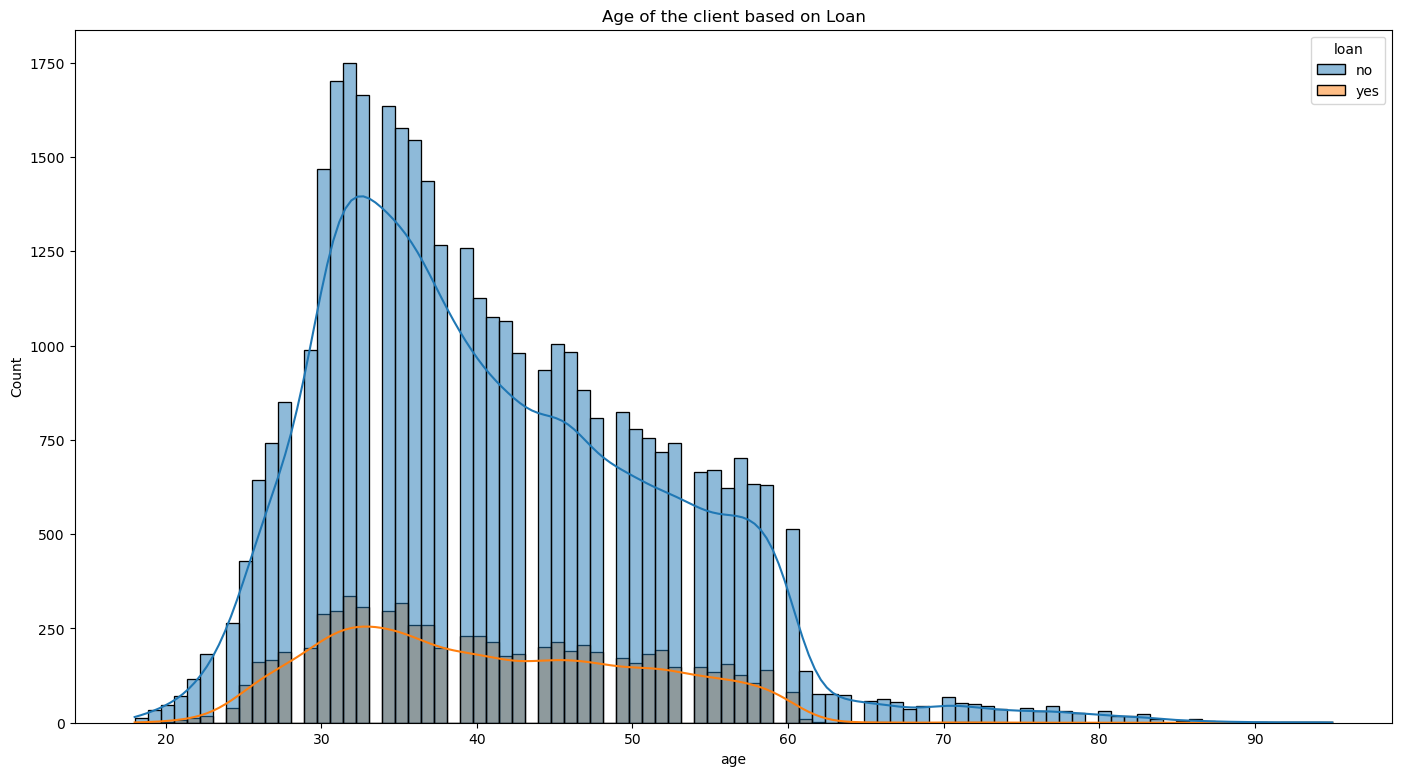

In [144]:
plt.figure(figsize=(17,9))
sns.histplot(data=df,x='age',hue='loan',kde=True)
plt.title('Age of the client based on Loan')
plt.show()

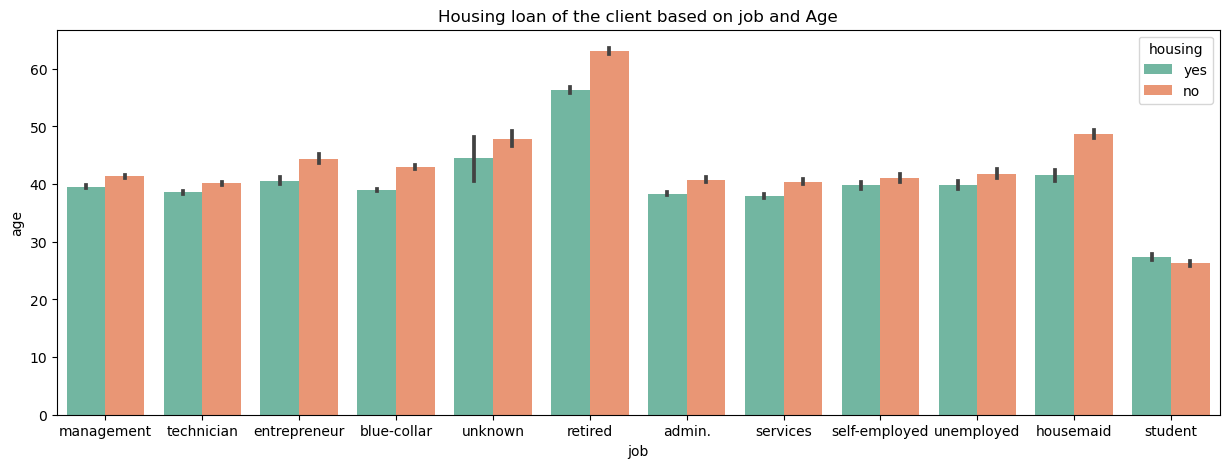

In [145]:
plt.figure(figsize=(15,5))
sns.barplot(data = df,x='job',y='age',hue='housing',palette='Set2')
plt.title('Housing loan of the client based on job and Age')
plt.show()

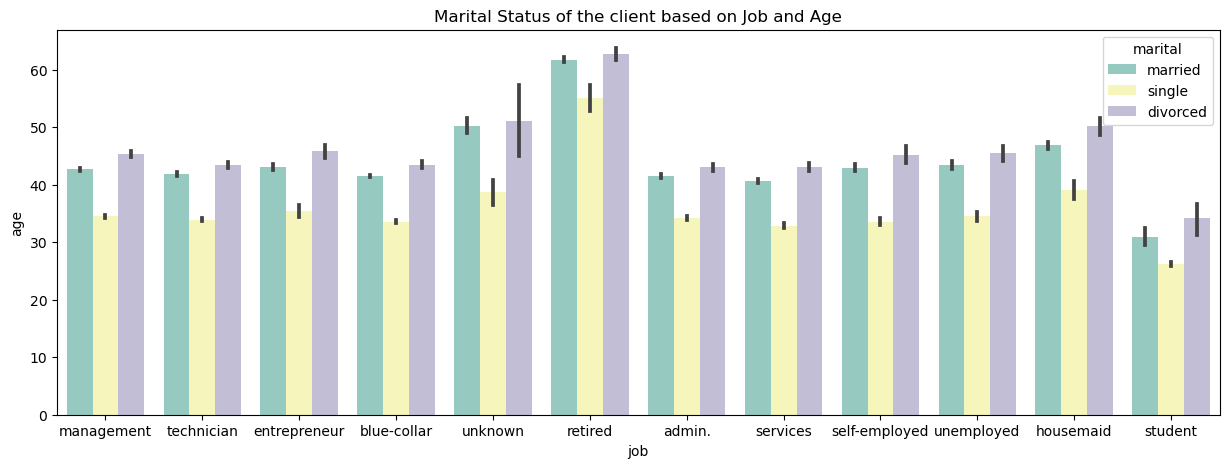

In [146]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='job',y='age',hue='marital',palette='Set3')
plt.title('Marital Status of the client based on Job and Age')
plt.show()

In [147]:
#encode/convert the categorical variables
df_enc = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
df_enc.info()
df_enc.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   previous             45211 non-null  int64 
 7   y                    45211 non-null  object
 8   job_admin.           45211 non-null  bool  
 9   job_blue-collar      45211 non-null  bool  
 10  job_entrepreneur     45211 non-null  bool  
 11  job_housemaid        45211 non-null  bool  
 12  job_management       45211 non-null  bool  
 13  job_retired          45211 non-null  bool  
 14  job_self-employed    45211 non-null  bool  
 15  job_services         45211 non-null  bool  
 16  job_

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,False,False,True


In [148]:
#Splitting the data to features and target
X = df_enc.drop('y', axis = 1)
y = df_enc['y']
#Splitting the data to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

Accuracy: 90.07 %
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7996
         yes       0.62      0.38      0.47      1047

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Confusion matrix:
 [[7747  249]
 [ 649  398]]


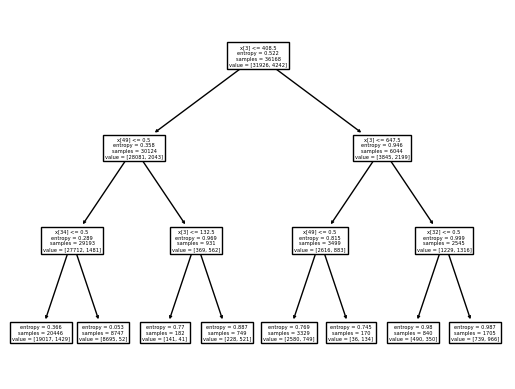

In [149]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion= 'entropy',max_depth = 3, random_state = 45)
clf.fit(X_train,y_train)
#Prediction
y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),'%')
print("Classification Report:\n", classification_report(y_test, y_pred))
plot_tree(clf)
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))

Inference:The model has a overall accuracy of 90.07%.

Confusion Matrix:

True Positives (TP): 7747

True Negatives (TN): 398

False Positives (FP) : 249

False Negatives (FN) : 649